# Data Mining and Machine Learning - Assignment 1 - SOLUTIONS
## EDA, Visualization and Regression

#### Due: Sunday Nov 01 11:59pm 

The purpose of this assignment is to review the different concepts seen in class so far (i.e. data cleaning, EDA, visualization and regression). To this end, we analyze COVID-19 data.

Run the first few cells to load the dataset and then get started with the questions! Once you are done you have to do **both**:

1. Submit your Python notebook [here](https://moodle.unil.ch/mod/assign/view.php?id=841447)
2. Answer the questions to the quiz [here](https://moodle.unil.ch/mod/quiz/view.php?id=918142)

The answers to the quiz should be supported by your code. If they are not you will not receive the points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** We will run your code and check for similarities.

You can post your questions in slack (channel `#assignment1_questions`).

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repo for updates.


Good luck!

In [1]:
# Import requiered packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# Load data
df = pd.read_csv("data/COVID.csv")

## 1. Understand and Clean the Dataset

### 1.1 Show the first 5 or 10 rows to get an idea of the data. What does each column show?

In [3]:
df.head()

,AdministrativeDivision,Country,Latitude,Longitude,Deaths,Confirmed,Recovered,Date
0,Maharashtra,India,19.453778,76.12177,8053.0,180298.0,93154.0,2020-07-01
1,Maharashtra,India,19.453778,76.12177,8178.0,186626.0,101172.0,2020-07-02
2,Maharashtra,India,19.453778,76.12177,8376.0,192990.0,104687.0,2020-07-03
3,Maharashtra,India,19.453778,76.12177,8671.0,200064.0,108082.0,2020-07-04
4,Maharashtra,India,19.453778,76.12177,8822.0,206619.0,111740.0,2020-07-05


### 1.2 Describe the dataset.
#### 1.2.1 How many rows and columns are in the dataset? 
#### 1.2.2 Describe the different features (small description and their type)
#### 1.2.3 For which time period these data samples have been collected? (i.e, the oldest and the most recent dates in the dataset)
#### 1.2.4 Are there missing/null values?
#### 1.2.5 How many countries are there?
#### 1.2.6 How many "Administrative Divisions" are there for the country "United States"?


In [4]:
# 1.2.1
df.shape

(82908, 8)

In [5]:
# 1.2.2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 8 columns):
AdministrativeDivision    59486 non-null object
Country                   82908 non-null object
Latitude                  81046 non-null float64
Longitude                 81046 non-null float64
Deaths                    78740 non-null float64
Confirmed                 78740 non-null float64
Recovered                 78740 non-null float64
Date                      82908 non-null object
dtypes: float64(5), object(3)
memory usage: 5.1+ MB


In [6]:
# 1.2.3: Time period
df["Date"].unique()

array(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
       '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
       '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
       '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
       '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
       '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
       '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
       '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
       '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
       '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
       '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
       '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
       '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
       '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
       '2020-08-30', '2020-08-31', '2020-09-01', '2020-

In [7]:
len(df["Date"].unique())

98

In [8]:
# 1.2.4: Null values
df.isnull().sum()

AdministrativeDivision    23422
Country                       0
Latitude                   1862
Longitude                  1862
Deaths                     4168
Confirmed                  4168
Recovered                  4168
Date                          0
dtype: int64

In [9]:
# 1.2.5: Number of countries
len(df["Country"].unique())

218

There are 82908 rows and 8 columns. One row represents the number of deaths, confirmed cases and recovered cases for a country or region at a specific date. The dates start on 1 July 2020 and end on 6 October 2020. There are 218 different countries. Latitude and longitude of the country/division are also provided.

* For `AdministrativeDivision`, they are countries for which we do not have the information per region/division/canton. 

* For `Latitude` and `Longitude`, they are missing data.

* For the other features, they are dates at which we do not have the information (i.e. also missing data).

In [10]:
# Example of missing data for Geolocalisation
df[df["Latitude"].isnull() == True]

,AdministrativeDivision,Country,Latitude,Longitude,Deaths,Confirmed,Recovered,Date
9114,NaN,UnitedKingdom,NaN,NaN,0.0,116237.0,0.0,2020-07-01
9115,NaN,UnitedKingdom,NaN,NaN,0.0,0.0,0.0,2020-07-02
9116,NaN,UnitedKingdom,NaN,NaN,0.0,0.0,0.0,2020-07-03
9117,NaN,UnitedKingdom,NaN,NaN,0.0,0.0,0.0,2020-07-04
9118,NaN,UnitedKingdom,NaN,NaN,0.0,0.0,0.0,2020-07-05
...,...,...,...,...,...,...,...,...
82805,NaN,Brazil,NaN,NaN,NaN,NaN,NaN,2020-10-02
82806,NaN,Brazil,NaN,NaN,NaN,NaN,NaN,2020-10-03
82807,NaN,Brazil,NaN,NaN,NaN,NaN,NaN,2020-10-04
82808,NaN,Brazil,NaN,NaN,NaN,NaN,NaN,2020-10-05


In [11]:
# 1.2.6: Administrative divisions for United States
print(df[df["Country"] == "UnitedStates"]["AdministrativeDivision"].unique())
print(len(df[df["Country"] == "UnitedStates"]["AdministrativeDivision"].unique()))

['California' 'Texas' 'Florida' 'NewYork' 'Georgia' 'Illinois' 'Arizona'
 'NorthCarolina' 'NewJersey' 'Tennessee' 'Pennsylvania' 'Louisiana' 'Ohio'
 'Alabama' 'SouthCarolina' 'Virginia' 'Michigan' 'Wisconsin' 'Missouri'
 'Massachusetts' 'Maryland' 'Indiana' 'Minnesota' 'Mississippi' 'Iowa'
 'Oklahoma' 'Washington' 'Arkansas' 'Nevada' 'Utah' 'Kentucky' 'Colorado'
 'Kansas' 'Connecticut' 'Nebraska' 'Idaho' 'Oregon' 'NewMexico'
 'RhodeIsland' 'SouthDakota' 'NorthDakota' 'Delaware' 'WestVirginia'
 'DistrictOfColumbia' 'Montana' 'Hawaii' 'Alaska' 'NewHampshire' 'Wyoming'
 nan 'Maine' 'Vermont']
52


### 1.3 Data types
#### 1.3.1 Show how the column data types are interpreted when the data is loaded. For which column(s) would you like to change the data type? 
#### 1.3.2 Change the data type that have to be changed.

In [12]:
# 1.3.1
df.dtypes

AdministrativeDivision     object
Country                    object
Latitude                  float64
Longitude                 float64
Deaths                    float64
Confirmed                 float64
Recovered                 float64
Date                       object
dtype: object

`Date` has to be changed to datetime. The rest is correct.

In [13]:
# 1.3.2 Change date to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 8 columns):
AdministrativeDivision    59486 non-null object
Country                   82908 non-null object
Latitude                  81046 non-null float64
Longitude                 81046 non-null float64
Deaths                    78740 non-null float64
Confirmed                 78740 non-null float64
Recovered                 78740 non-null float64
Date                      82908 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.1+ MB


### 1.4 Null values
#### 1.4.1 Fill the null values in the columns `Confirmed`, `Deaths`, and `Recovered` by zero.

In [14]:
# 1.4.1
df["Confirmed"].fillna(0, inplace=True)
df["Deaths"].fillna(0, inplace=True)
df["Recovered"].fillna(0, inplace=True)

## 2. EDA and Visualization

### 2.1 For the most recent date, calculate the number of `Confirmed` cases by `Country`. Which country has the second highest number of cases?

In [15]:
df[df["Date"] == "2020-10-06"].groupby("Country", as_index=False)["Confirmed"].sum().sort_values("Confirmed", ascending=False)

,Country,Confirmed
207,UnitedStates,7445013.0
90,India,6757131.0
27,Brazil,4969141.0
163,Russia,1231277.0
42,Colombia,869808.0
...,...,...
135,Montserrat,13.0
63,FalklandIslands,13.0
211,VaticanCity,12.0
214,WesternSahara,10.0


### 2.2 For the most recent date, plot the top 10 countries in terms of number of cases using an appropriate plot type.

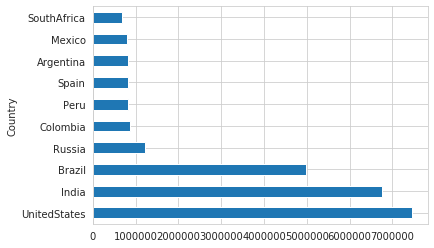

In [16]:
df[df["Date"] == "2020-10-06"].groupby("Country", as_index=True)['Confirmed'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

### 2.3 Create a new DataFrame where you group the information by `Country` and `Date` (i.e. we want to get rid off `AdministrativeDivision`). The remaining columns of the new DataFrame are as follows:
* Drop `AdministrativeDivision`.
* `Latitude` and `Longitude` should be averaged per `Country`.
* `Deaths`, `Confirmed`, and `Recovered` should be accumulated per `Country` and `Date`.

__In the remaining, we will work with this DataFrame.__

In [17]:
# Drop and groupby
df_countries = df.drop('AdministrativeDivision', axis=1)
df_countries = df_countries.groupby(["Country", "Date"], as_index=False).agg({"Latitude":"mean", "Longitude":"mean", "Deaths":"sum", "Confirmed":"sum", "Recovered":"sum"})
df_countries

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered
0,Afghanistan,2020-07-01,33.0,65.0,774.0,31836.0,15651.0
1,Afghanistan,2020-07-02,33.0,65.0,807.0,32022.0,16041.0
2,Afghanistan,2020-07-03,33.0,65.0,819.0,32324.0,17331.0
3,Afghanistan,2020-07-04,33.0,65.0,826.0,32672.0,19164.0
4,Afghanistan,2020-07-05,33.0,65.0,864.0,32951.0,19366.0
...,...,...,...,...,...,...,...
21359,Zimbabwe,2020-10-02,-20.0,30.0,228.0,7858.0,6322.0
21360,Zimbabwe,2020-10-03,-20.0,30.0,228.0,7885.0,6327.0
21361,Zimbabwe,2020-10-04,-20.0,30.0,228.0,7888.0,6359.0
21362,Zimbabwe,2020-10-05,-20.0,30.0,228.0,7898.0,6424.0


#### 2.3.1 How many rows and columns does the new DataFrame have?

In [18]:
df_countries.shape # 98 dates * 218 countries

(21364, 7)

#### 2.3.2 What was the total number of deaths due to COVID-19 in India by third of July 2020?

In [19]:
df_countries[df_countries["Country"] == "India"]

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered
8820,India,2020-07-01,22.508041,81.466091,17834.0,604641.0,359860.0
8821,India,2020-07-02,22.508041,81.466091,18213.0,625544.0,379892.0
8822,India,2020-07-03,22.508041,81.466091,18655.0,648315.0,394227.0
8823,India,2020-07-04,22.508041,81.466091,19268.0,673165.0,409083.0
8824,India,2020-07-05,22.508041,81.466091,19693.0,697413.0,424433.0
...,...,...,...,...,...,...,...
8913,India,2020-10-02,22.508041,81.466091,100842.0,6473544.0,5427706.0
8914,India,2020-10-03,22.508041,81.466091,101782.0,6549373.0,5509966.0
8915,India,2020-10-04,22.508041,81.466091,102685.0,6623815.0,5586703.0
8916,India,2020-10-05,22.508041,81.466091,103569.0,6685082.0,5662490.0


### 2.3.3 Which country has the lowest ratio of total recovered cases over total confirmed cases by 6th of October 2020? (ignore the countries which have zero recovered cases as this is most probably due to missing data)

In [20]:
recent_date_df = df_countries[(df_countries["Date"] == "2020-10-06") & (df_countries["Recovered"] > 0)]
recent_date_df["ratio"] = recent_date_df["Recovered"] / recent_date_df["Confirmed"]
recent_date_df.sort_values("ratio", ascending=True)

/home/ahmad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered,ratio
20285,UnitedKingdom,2020-10-06,53.493763,-3.636748,42493.0,530808.0,600.0,0.001130
12249,Martinique,2020-10-06,14.667000,-61.000000,22.0,1851.0,98.0,0.052944
7545,Greece,2020-10-06,39.000000,22.000000,420.0,20541.0,1347.0,0.065576
6663,France,2020-10-06,46.227600,2.213700,32140.0,646531.0,80933.0,0.125180
1861,Belgium,2020-10-06,50.833000,4.000000,10092.0,134291.0,19812.0,0.147530
...,...,...,...,...,...,...,...,...
14013,NewCaledonia,2020-10-06,-20.904300,165.618000,0.0,27.0,27.0,1.000000
7643,Greenland,2020-10-06,71.706900,-42.604300,0.0,14.0,14.0,1.000000
6271,FalklandIslands,2020-10-06,-51.750000,-59.000000,0.0,13.0,13.0,1.000000
587,Anguilla,2020-10-06,18.210000,-63.058000,0.0,3.0,3.0,1.000000


### 2.4 BONUS QUESTION. The columns `Deaths`, `Confirmed`, and `Recovered` are expressed using cumulative amounts. Create three new columns `Deaths New`, `Confirmed New`, and `Recovered New` and compute the number of new cases per `Country` for each `Date`. How many new confirmed cases were there in Zimbabwe on October 2, 2020?

In [21]:
# Get list of countries
countries_list = df_countries["Country"].unique()

# Create empty DataFrame
df_countries_agg = pd.DataFrame()

# Demerge, merge and concat
for country in countries_list:
    temp_df = df_countries[df_countries["Country"] == country][["Deaths", "Confirmed", "Recovered"]].diff()
    temp_df.columns = ["Deaths New", "Confirmed New", "Recovered New"]
    temp_df["Date"] = df_countries[df_countries["Country"] == country]["Date"]
    
    df_merged = df_countries[df_countries["Country"] == country].merge(temp_df, how='outer', on='Date')
    
    df_countries_agg = pd.concat([df_countries_agg, df_merged])

df_countries_agg

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered,Deaths New,Confirmed New,Recovered New
0,Afghanistan,2020-07-01,33.0,65.0,774.0,31836.0,15651.0,NaN,NaN,NaN
1,Afghanistan,2020-07-02,33.0,65.0,807.0,32022.0,16041.0,33.0,186.0,390.0
2,Afghanistan,2020-07-03,33.0,65.0,819.0,32324.0,17331.0,12.0,302.0,1290.0
3,Afghanistan,2020-07-04,33.0,65.0,826.0,32672.0,19164.0,7.0,348.0,1833.0
4,Afghanistan,2020-07-05,33.0,65.0,864.0,32951.0,19366.0,38.0,279.0,202.0
...,...,...,...,...,...,...,...,...,...,...
93,Zimbabwe,2020-10-02,-20.0,30.0,228.0,7858.0,6322.0,0.0,8.0,10.0
94,Zimbabwe,2020-10-03,-20.0,30.0,228.0,7885.0,6327.0,0.0,27.0,5.0
95,Zimbabwe,2020-10-04,-20.0,30.0,228.0,7888.0,6359.0,0.0,3.0,32.0
96,Zimbabwe,2020-10-05,-20.0,30.0,228.0,7898.0,6424.0,0.0,10.0,65.0


### 2.5 Plot the cumulative number of `Deaths` over time for Switzerland.

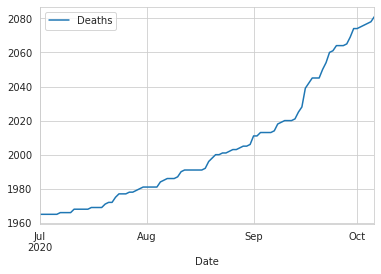

In [22]:
country = 'Switzerland'

df_countries[df_countries["Country"] == country].plot(x = "Date", y = "Deaths")

### 2.6 Plot the number of new `Deaths` over time for Switzerland (i.e. not cumulative). On which day in this time period (1st of July untill 6th of October), we see a peak in the daily number of deaths in Switzerland?
__Hint: Note that for this question you don't need to have the bonus question solved. There is method that you can apply on pandas Series in order to compute the difference between each row and its previous row (or any other element in the Series). This method is called `diff()`. Check out the documentation for more info.

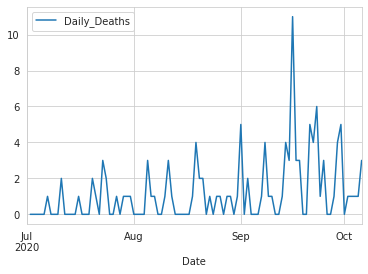

In [23]:
total_deaths = df_countries[df_countries["Country"] == country][["Date", "Deaths"]]
total_deaths["Daily_Deaths"] = total_deaths["Deaths"].diff()
total_deaths.plot(x="Date", y="Daily_Deaths")

In [24]:
total_deaths[total_deaths["Daily_Deaths"] == total_deaths["Daily_Deaths"].max()]

,Date,Deaths,Daily_Deaths
18893,2020-09-16,2039.0,11.0


### 2.7 Using the method you used in the previous question, plot the number of new deaths per week in Switzerland. How many new deaths occured in the week starting from 16th of September and ending on 22nd of September?

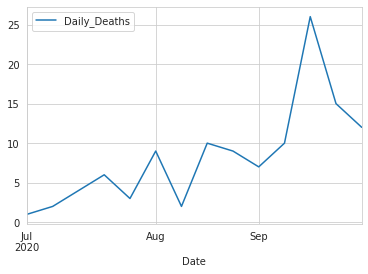

In [25]:
total_deaths.set_index('Date').resample('7D').sum().reset_index().plot(x="Date", y="Daily_Deaths")

In [26]:
total_deaths.set_index('Date').resample('7D').sum()

,Deaths,Daily_Deaths
Date,,
2020-07-01,13756.0,1.0
2020-07-08,13770.0,2.0
2020-07-15,13787.0,4.0
2020-07-22,13834.0,6.0
2020-07-29,13864.0,3.0
2020-08-05,13904.0,9.0
2020-08-12,13938.0,2.0
2020-08-19,13998.0,10.0
2020-08-26,14037.0,9.0


### 2.8 For the most recent date and the top 10 countries, generate a map showing the cumulative number of confirmed cases per country. For example, color countries according to their number of confirmed cases.

In [27]:
last_date = df_countries[df_countries["Date"] == "2020-10-06"]
last_date = last_date[["Country", "Confirmed", "Latitude", "Longitude"]]
last_date

,Country,Confirmed,Latitude,Longitude
97,Afghanistan,39486.0,33.00,65.00
195,Albania,14568.0,41.00,20.00
293,Algeria,52399.0,28.00,3.00
391,Andorra,2370.0,42.50,1.50
489,Angola,5725.0,-12.50,18.50
...,...,...,...,...
20971,Vietnam,1098.0,16.17,107.83
21069,WesternSahara,10.0,24.50,-13.00
21167,Yemen,2047.0,15.00,48.00
21265,Zambia,15170.0,-15.00,30.00


In [28]:
last_date_top_10 = last_date.sort_values("Confirmed").tail(10)
last_date_top_10

,Country,Confirmed,Latitude,Longitude
18031,SouthAfrica,683242.0,-29.000000,24.000000
12641,Mexico,794608.0,21.794827,-100.543698
783,Argentina,824468.0,-34.000000,-64.000000
18325,Spain,825410.0,36.466648,-6.721572
15189,Peru,829999.0,-10.621369,-75.317329
4213,Colombia,869808.0,5.328292,-74.165774
16071,Russia,1231277.0,54.736232,62.570822
2743,Brazil,4969141.0,-12.348644,-48.687333
8917,India,6757131.0,22.508041,81.466091
20383,UnitedStates,7445013.0,39.472800,-89.616806


In [33]:
# Create an empty map
m = folium.Map(location=[20,0], tiles="Stamen Toner", zoom_start=2)
 
# Add marker one by one on the map
for i in range(0,len(last_date_top_10)):
   folium.CircleMarker(
      location=[last_date_top_10.iloc[i]["Latitude"], last_date_top_10.iloc[i]["Longitude"]],
      popup=last_date_top_10.iloc[i]["Country"],
      #tooltip=last_date_top_10.iloc[i]["Confirmed"]
      radius=float(last_date_top_10.iloc[i]['Confirmed'])/50000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map
m

## 3. Regression
__For this section you need to work on the data which is aggregated by countries, i.e, the dataframe you created in question 2.3. Here, we are providing that dataframe for you. So if something has possibly went wrong for you in Section, you could still do this section correctly.__

In [29]:
df_countries = pd.read_csv("data/COVID_per_country.csv")

### 3.1 Create two new columns `Day` and `Month` with, resp., the day and month values of each row.

In [30]:
df_countries['Day'] = pd.DatetimeIndex(df_countries['Date']).year
df_countries['Month'] = pd.DatetimeIndex(df_countries['Date']).month
df_countries

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered,Day,Month
0,Afghanistan,2020-07-01,33.0,65.0,774.0,31836.0,15651.0,2020,7
1,Afghanistan,2020-07-02,33.0,65.0,807.0,32022.0,16041.0,2020,7
2,Afghanistan,2020-07-03,33.0,65.0,819.0,32324.0,17331.0,2020,7
3,Afghanistan,2020-07-04,33.0,65.0,826.0,32672.0,19164.0,2020,7
4,Afghanistan,2020-07-05,33.0,65.0,864.0,32951.0,19366.0,2020,7
...,...,...,...,...,...,...,...,...,...
21359,Zimbabwe,2020-10-02,-20.0,30.0,228.0,7858.0,6322.0,2020,10
21360,Zimbabwe,2020-10-03,-20.0,30.0,228.0,7885.0,6327.0,2020,10
21361,Zimbabwe,2020-10-04,-20.0,30.0,228.0,7888.0,6359.0,2020,10
21362,Zimbabwe,2020-10-05,-20.0,30.0,228.0,7898.0,6424.0,2020,10


In [31]:
df_countries[df_countries["Country"] == "France"]

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered,Day,Month
6566,France,2020-07-01,46.2276,2.2137,29780.0,194985.0,71879.0,2020,7
6567,France,2020-07-02,46.2276,2.2137,29794.0,195458.0,72054.0,2020,7
6568,France,2020-07-03,46.2276,2.2137,29812.0,195904.0,72181.0,2020,7
6569,France,2020-07-04,46.2276,2.2137,29812.0,195546.0,72092.0,2020,7
6570,France,2020-07-05,46.2276,2.2137,29813.0,195535.0,72092.0,2020,7
...,...,...,...,...,...,...,...,...,...
6659,France,2020-10-02,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6660,France,2020-10-03,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6661,France,2020-10-04,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6662,France,2020-10-05,46.2276,2.2137,32096.0,636196.0,80394.0,2020,10


### 3.2 Regress `Confirmed` (y) on `Latitude`, `Longitude`, `Day`, and `Month` (X).

#### 3.2.1 Select the dependent variable (y) and independent (X) variables

In [32]:
y = df_countries["Confirmed"]
X = df_countries[["Latitude", "Longitude", "Day", "Month"]]

#### 3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use `sklearn.model_selection.train_test_split()` and set the `random_state` to 42.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2.3 Train a linear regression model on the training data. What is the R^2 score for the training data? (answer rounded to 2 decimal floating point accuray)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([  317.38477715,  -735.10178338,     0.        , 33913.75210378])

In [36]:
reg.score(X_train, y_train)

0.01223642963800009

#### 3.2.4 Predict: What would be the total number of confirmed cases by 10th of October for France?

In [38]:
X_new = pd.DataFrame({'Latitude':df_countries[df_countries.Country == "France"].Latitude.values[0], 
         'Longitude':df_countries[df_countries.Country == "France"].Longitude.values[0],
         'Day':10, 'Month':10}, index=[0])
X_new

,Latitude,Longitude,Day,Month
0,46.2276,2.2137,10,10


In [39]:
y_pred = reg.predict(X_new)
print(y_pred)

[183180.04660159]


In [40]:
df_countries[df_countries["Country"] == "France"]

,Country,Date,Latitude,Longitude,Deaths,Confirmed,Recovered,Day,Month
6566,France,2020-07-01,46.2276,2.2137,29780.0,194985.0,71879.0,2020,7
6567,France,2020-07-02,46.2276,2.2137,29794.0,195458.0,72054.0,2020,7
6568,France,2020-07-03,46.2276,2.2137,29812.0,195904.0,72181.0,2020,7
6569,France,2020-07-04,46.2276,2.2137,29812.0,195546.0,72092.0,2020,7
6570,France,2020-07-05,46.2276,2.2137,29813.0,195535.0,72092.0,2020,7
...,...,...,...,...,...,...,...,...,...
6659,France,2020-10-02,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6660,France,2020-10-03,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6661,France,2020-10-04,46.2276,2.2137,31952.0,601971.0,80061.0,2020,10
6662,France,2020-10-05,46.2276,2.2137,32096.0,636196.0,80394.0,2020,10


__You can see that this prediction is pretty inaccurate. Try to train a new model but this time only on the data samples for France. Could you improve the prediction?__

In [41]:
y = df_countries[df_countries["Country"] == "France"]["Confirmed"]
X = df_countries[df_countries["Country"] == "France"][["Day", "Month"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7932342243728048

In [43]:
y_pred = reg.predict(X_new[["Day", "Month"]])
print(y_pred)

[549347.81904762]
